### 1.3.2 Arithmetic Operations on Images ###

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [9]:
x = 250
y = 10
x + y

260

In [10]:
y = np.uint8([10])

In [11]:
print(y)

[10]


In [12]:
x + y

array([4], dtype=uint8)

In [13]:
cv2.add(x,y)

array([[255]], dtype=uint8)

### Image Blending ###

In [43]:
img1 = cv2.imread('dog.jpg')
img2 = cv2.imread('logo.jpg')

In [44]:

# cv2.addWeighted(imgA, a, imgB, b, c)
# result = imgA * a + imgB * b + c
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

In [45]:
cv2.imshow('dst',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [ ]:
img1 = cv2.imread('dog.jpg')
img2 = cv2.imread('logo.jpg')

cv2.namedWindow('image')
cv2.createTrackbar('weight', 'image', 0, 255, nothing)

while(True):
    k = cv2.waitKey(1) & 0xFF
    
    if k == 27:
        break
    weight = cv2.getTrackbarPos('weight', 'image')
    dst = cv2.addWeighted(img1, weight/255, img2, 1-weight/255,0)
    cv2.imshow('image', dst)

cv2.destroyAllWindows()
cv2.waitKey(1)

In [47]:
# Load two images
img1 = cv2.imread('dog.jpg')
img2 = cv2.imread('logo.jpg')

In [48]:
# def pltImage(img):
#     plt.imshow(img)
#     plt.xticks([]), plt.yticks([])
#     plt.show
    
# def pltImage(img):
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
#     plt.show()

def pltImage(img):
    channels = len(img.shape)
    if channels == 3:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
    plt.show()

In [49]:
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
print(rows, cols, channels)

250 200 3


In [50]:
# img2의 크기만큼 img1를 잘라낸걸 roi에 저장한다.
roi = img1[0:rows, 0:cols ]

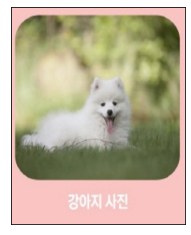

In [52]:
pltImage(img1)

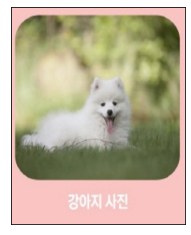

In [53]:
pltImage(roi)

In [54]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

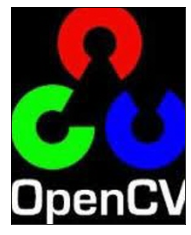

In [55]:
pltImage(img2)

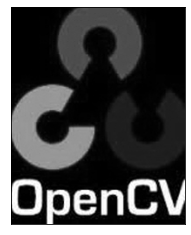

In [56]:
pltImage(img2gray)

In [57]:
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

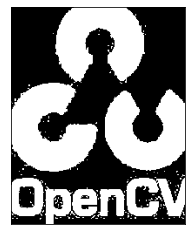

In [58]:
pltImage(mask)

In [59]:
mask_inv = cv2.bitwise_not(mask)

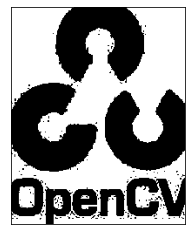

In [60]:
pltImage(mask_inv)

In [69]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)

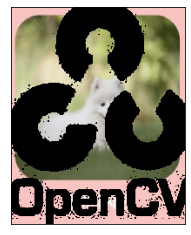

In [62]:
pltImage(img1_bg)

In [63]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)

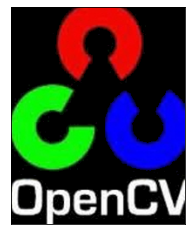

In [68]:
pltImage(img2_fg)

In [65]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols] = dst

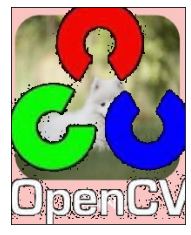

In [66]:
pltImage(img1)

In [67]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1